# 1. Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

store = pd.read_csv("CC GENERAL.csv", delimiter=",")

In [2]:
store.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Percentage of missing data
store.isna().sum()/store.shape[0]*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

## Preprocessing

In [5]:
store.MINIMUM_PAYMENTS.fillna(store.MINIMUM_PAYMENTS.mean(), inplace=True)

In [6]:
store[store.CREDIT_LIMIT.isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [7]:
# missing CREDIT_LIMIT value
credit_lim_val = store[(store.PURCHASES == 0.0) & (store.INSTALLMENTS_PURCHASES == 0.0) & (store.PURCHASES_FREQUENCY == 0.0) & (store.CASH_ADVANCE_TRX == 1) & (store.PRC_FULL_PAYMENT == 0.0) & (store.TENURE == 6) & (store.ONEOFF_PURCHASES == 0.0) & (store.PURCHASES_TRX == 0)].CREDIT_LIMIT.median()
store.CREDIT_LIMIT.fillna(credit_lim_val, inplace=True)

In [8]:
# Making sure that no other features are missing any values
store.isna().sum().sum()

0

### Normalization of data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(store.drop("CUST_ID", axis=1)), columns=store.columns[1:])



# 2. Hierarchical Clustering

In [141]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

model=AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
clust_labels = model.fit_predict(data)
agglomerative=pd.DataFrame(clust_labels, columns=["Class"])
agglomerative.value_counts()

Class
0        5680
1        2397
2         873
dtype: int64

# 3. Clustering Plot

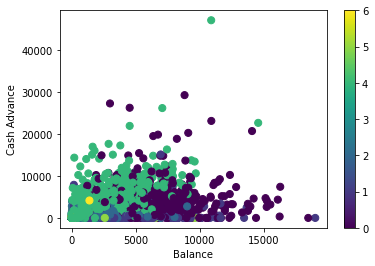

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(store['BALANCE'], store["CASH_ADVANCE"], c=agglomerative.Class, s=50)
plt.xlabel("Balance")
plt.ylabel("Cash Advance")
plt.colorbar(scatter)

We can't possibly avaluate the model using the scatter plot since our number of dimensions exceeds 3.<br>
Thus, we can use <u>Silhouette_Score</u> in order to evaluate how far apart our clusters are

In [142]:
from sklearn.metrics import silhouette_score

n = 15   # number of clusters
for N in range(2,n):
    model=AgglomerativeClustering(n_clusters=N, affinity='cosine', linkage='complete')
    clust_labels = model.fit_predict(data)
    agglomerative=pd.DataFrame(clust_labels, columns=["Class"])
    score = silhouette_score(data, clust_labels)
    print("Silhouette Score (n=%d) = %.3f" % (N, score))
    # agglomerative.value_counts()

Silhouette Score (n=2) = 0.175
Silhouette Score (n=3) = 0.169
Silhouette Score (n=4) = -0.037
Silhouette Score (n=5) = -0.011
Silhouette Score (n=6) = 0.015
Silhouette Score (n=7) = 0.015
Silhouette Score (n=8) = 0.022
Silhouette Score (n=9) = 0.038
Silhouette Score (n=10) = 0.055
Silhouette Score (n=11) = 0.069
Silhouette Score (n=12) = 0.070
Silhouette Score (n=13) = 0.081
Silhouette Score (n=14) = 0.074


From the results above, it's clear that our data is best seperated when choosing <u>number of clusters = 2</u>

### Final Agglomerative Model

In [169]:
model=AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
clust_labels = model.fit_predict(data)
agglomerative=pd.DataFrame(clust_labels, columns=["Class"])

### Plot

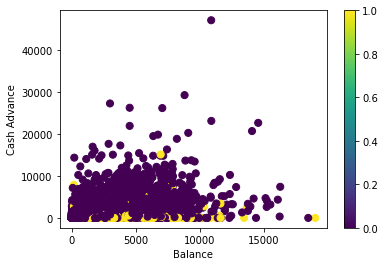

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(store['BALANCE'], store["CASH_ADVANCE"], c=agglomerative.Class, s=50)
plt.xlabel("Balance")
plt.ylabel("Cash Advance")
plt.colorbar(scatter)

Scatter plot won't help us tell if the two clusters are clearly distinguished as long as we're using more than 2 features for clustering.

## K-means Clustering

### Dendrogram using k-means

#### Testing different values for an optimal K

In [188]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
import operator
n = 15
SSE, scores = [], []
for N in range(2, n):
    kmeans=KMeans(n_clusters=N, random_state=SEED)
    kmeans.fit(data)
    SSE.append( kmeans.inertia_ )
    scores.append((N, silhouette_score(data, kmeans.labels_)))

In [200]:
scores = sorted(scores, key=operator.itemgetter(1), reverse=True)
for item in scores:
    print("Silhouette Score (k=%d) = %5.3f" % (item[0], item[1]))

Silhouette Score (k=3) = 0.251
Silhouette Score (k=8) = 0.222
Silhouette Score (k=10) = 0.220
Silhouette Score (k=11) = 0.219
Silhouette Score (k=13) = 0.219
Silhouette Score (k=12) = 0.216
Silhouette Score (k=7) = 0.215
Silhouette Score (k=9) = 0.213
Silhouette Score (k=2) = 0.210
Silhouette Score (k=6) = 0.203
Silhouette Score (k=14) = 0.199
Silhouette Score (k=4) = 0.198
Silhouette Score (k=5) = 0.193


#### Plot

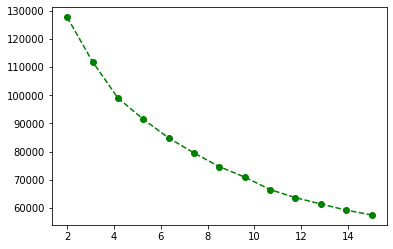

In [196]:
x = np.linspace(2, len(SSE)+2, len(SSE))
plt.plot(x, SSE, "go--")

From the above plot and the Silhouette Scores, we can deduce that the <u>optimal K value is **3**</u>

In [201]:
SEED = 40
kmeans=KMeans(n_clusters=3, random_state=SEED)
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_, columns=["Class"])

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram( shc.linkage(data, method="complete", metric="euclidean") )

## Comparison between *K-means Clustering* and *Hierarchical Clustering*

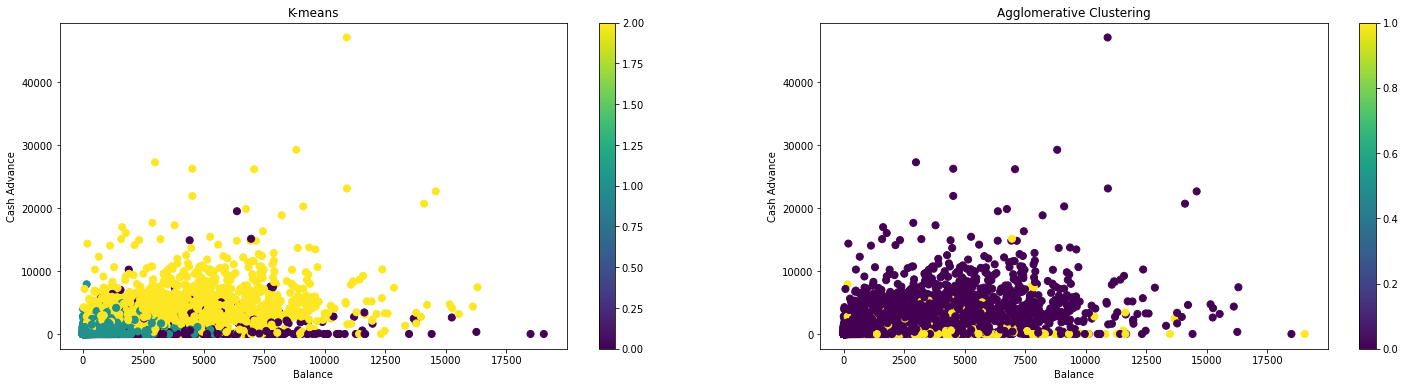

In [202]:
# We compare using plots

fig = plt.figure(figsize=(25, 6))
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(store['BALANCE'], store["CASH_ADVANCE"], c=kmeans.labels_, s=50)
plt.xlabel("Balance")
plt.ylabel("Cash Advance")
plt.title("K-means")
plt.colorbar(scatter)

ax2 = fig.add_subplot(122)
scatter = ax2.scatter(store['BALANCE'], store["CASH_ADVANCE"], c=agglomerative.Class, s=50)
plt.xlabel("Balance")
plt.ylabel("Cash Advance")
plt.title("Agglomerative Clustering")
plt.colorbar(scatter)

In our case, Agglomerative clustering outputed better results when the number of clusters was equal to 2,<br>
However, in case of K-means, using the <u>Elbow Method</u> we found that the optimal K value equal to 4.<br>
Thus, the results couldn't be compared using scatter plot (beside the fact that we have more than 3 features which we can't plot in a 2D plot).

Instead, we'll use, once again, the <u>Silhouette Score</u> to evaluate and compare the two models.

In [203]:
print("Silhouette Score (k-means) =\t %10.3f" % silhouette_score(data, kmeans.labels_) )
print("Silhouette Score (Agglomerative) =%10.3f" % silhouette_score(data, clust_labels) )

Silhouette Score (k-means) =	      0.251
Silhouette Score (Agglomerative) =     0.175


Based on the results of the Silhouette Score, we can conclude that *K-means* perfomed better than the *Agglomerative Clustering*